In [236]:
%reload_ext blackcellmagic
import pandas as pd
import numpy as np
import os
import pprint as pp
import matplotlib.pyplot as plt

pd.options.display.max_rows = 100

In [237]:
# this function will return a dataframe where only the specified variable will be available
# the datasets are set up where all countries are displayed with one variable then another dataframe with a different variable was concatenated below it
colors = [
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
    "b",
    "g",
    "r",
    "c",
    "m",
    "y",
    "k",
]

def get_var(df, var):
    if "VAR" in df.columns:
        return df[df["VAR"] == var].fillna(value=0)
    elif 'ï»¿"MSTI_VAR"' in df.columns:
        return df[df['ï»¿"MSTI_VAR"'] == var].fillna(value=0)
    elif 'VARIABLE' in df.columns:
        return df[df['VARIABLE'] == var].fillna(0)


## this funtion returns a dataframe where the countries are the index and the years are the columns and values are allocated appropiately


def get_values(df):
    countries = list(df.Country.unique())
    data = {}
    if "Time" in df.columns:
        years = list(df.Time.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Time"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    elif "Year" in list(df.columns):
        years = list(df.Year.unique())
        for y in years:
            data[str(y)] = {}
            for c in countries:
                value = df.loc[(df["Country"] == c) & (df["Year"] == y)].Value.values
                if value.shape == (1,):
                    data[str(y)][c] = float(value)
                else:
                    data[str(y)][c] = np.nan

    return pd.DataFrame(data)

In [238]:
##this first database has information regarding broadband subscripstion
# i used fixed/mobile subscriptions for units: total and p100 people.
# this can be seen in the code_dict below
path = os.path.join("OECD_data", "broadband.csv")

with open(path) as csv_file:
    og_broadband_df = pd.read_csv(csv_file)

##I made a code_dict for every file because it got really hectic to try and decipher which code was which.
# I dont really use this in the code just makes it easier to understand whats going on
code_dicct = {
    "BB-P100-TOT": "Total fixed broadband suscriptions per 100 inhabitants",
    "BBW-P100-TOT": "Total mobile broadband subscriptions per 100 inhabitants",
    "BB-SUBS-TOT": "Total fixed broadband suscriptions",
    "BBW-SUBS-TOT": "Total mobile broadband subscriptions ",
}
og_bb_df = og_broadband_df[["Country", "VAR", "Time", "Value", "Unit"]]

In [239]:
path = os.path.join("OECD_data", "mean2median_wealth.csv")

with open(path) as csv_file:
    wealth_dist = pd.read_csv(csv_file)

wealth_dist = wealth_dist[["Country", "VAR", "Variable", "Time", "Value"]]

In [240]:
path = os.path.join("OECD_data", "GERD.csv")

with open(path) as csv_file:
    GERD = pd.read_csv(csv_file)

GERD = GERD[["Country", 'ï»¿"MSTI_VAR"', "MSTI Variables", "Year", "Value"]]

code_dict = {
    "G_XGDP": "GERD as a percentage of GDP",
    "TP_TT": "Total R&D personnel (FTE)",
    "TP_TTGRO": "Total R&D personnel, compound annual growth rate",
    "TH_RS": "Total researchers (headcount)",
    "TH_WRS": "Woman researchers (headcount)",
    "GDP_PPP": "Gross Domestic Product (current PPP$)",
    "VA_PPP": "Value Added of Industry (current PPP$)",
}



In [241]:
path = os.path.join("OECD_data", "economic_outlook.csv")

with open(path) as csv_file:
    econ_df = pd.read_csv(csv_file)

econ_df = econ_df[["Country", "VARIABLE", "Variable", "Time", "Value"]]

code_dict = {
    "UN": "Unemployment, level",
    "UNR": "Unemployment rate",
    "GAPUNR": "Unemployment gap",
    "TYB": "Direct taxes on business",
    "LF": "Labour force",
}

In [242]:
##endpoint dataframes are created by calling the two functions introduced at the beggining

fixed100_bb_df = get_var(og_bb_df, "BB-P100-TOT")
mob100_bb_df = get_var(og_bb_df, "BBW-P100-TOT")
fixed100_df = get_values(fixed100_bb_df[fixed100_bb_df["Time"].str.startswith("2")])
mobile100_df = get_values(mob100_bb_df[mob100_bb_df["Time"].str.startswith("2")])

fixed_bb_df = get_var(og_bb_df, "BB-SUBS-TOT")
mob_bb_df = get_var(og_bb_df, "BBW-SUBS-TOT")
fixed_df = get_values(fixed_bb_df[fixed_bb_df["Time"].str.startswith("2")])
mobile_df = get_values(mob_bb_df[mob_bb_df["Time"].str.startswith("2")])

POP = get_var(econ_df, "POP")
population = get_values(POP)

##fixed+mobile in persons
total_bb_df = pd.DataFrame()
for col in fixed_df.columns:
    total_bb_df[col] = fixed_df[col] + mobile_df[col]
    
total100_df = pd.DataFrame()
for col in total_bb_df.columns:
    total100_df[col] = (total_bb_df[col] / population[col]) * 100

total100_df = total100_df.dropna(axis=0)

In [243]:
##Research and Development
gdpRD = get_var(GERD, "G_XGDP")
gdpRD_df = get_values(gdpRD)

TP_TT = get_var(GERD, "TP_TT")
FTE = get_values(TP_TT)

TP_TTGRO = get_var(GERD, "TP_TTGRO")
FTE_growth = get_values(TP_TTGRO)

TH_RS = get_var(GERD, "TH_RS")
res_person = get_values(TH_RS)

TH_WR = get_var(GERD, "TH_WRS")
res_wom = get_values(TH_WR)

VA_PPP = get_var(GERD, "VA_PPP")
val_addedPPP = get_values(VA_PPP)

##economic_indicators
###check for GDP only not GDP as PPP 
GDP_PPP = get_var(GERD, "GDP_PPP")
gdp_ppp = get_values(GDP_PPP)

UN = get_var(econ_df, "UN")
unemployment_level = get_values(UN)

UNR = get_var(econ_df, "UNR")
unemployment_rate = get_values(UNR)

GAPUNR = get_var(econ_df, "GAPUNR")
unemployment_gap = get_values(GAPUNR)

TYB = get_var(econ_df, "TYB")
taxes_on_business = get_values(TYB)

LF = get_var(econ_df, "LF")
labour_force = get_values(LF)

POP = get_var(econ_df, "POP")
population = get_values(POP)

In [244]:
dataframes = [
    total_bb_df,
    fixed_df,
    mobile_df,
    fixed100_df,
    mobile100_df,
    gdp_ppp,
    gdpRD_df,
    val_addedPPP,
    FTE,
    res_person,
    res_wom,
    unemployment_level,
    unemployment_rate,
    unemployment_gap,
]
titles = [
    'total broadband subscriptions',
    'fixed broadband subscription',
    'mobile broadband subscription',
    "fixed subscription p 100 people",
    "mobile subscription p 100 people",
    "gdp at current PPP",
    "gdp % spent on Research and Development sector",
    "value added PP of RD sector",
    "FTE (Full Time Researchers)",
    "researchers (persons)",
    "researchers woman (persons)",
    "unemployment level",
    "unemployment rate",
    "unemployment gap",
]

In [245]:
def plotthese(dataframes, choice, label):
    ind = 0
    for df in dataframes:
        cc = 0
        fig, axs = plt.subplots(1, 4, figsize=(20, 8))

        head = choice.sort_values("2018", ascending=False).head()
        lab_head = list(choice.sort_values("2018", ascending=False).head().index)
        #dfhead =  mobile_df.sort_values("2018", ascending=True).head() ##sorts by 2018 and some years dont have  it how do we get around this??

        tail = choice.sort_values("2018", ascending=False).tail()
        lab_tail = list(choice.sort_values("2018", ascending=False).tail().index)
        #dftail =  mobile_df.sort_values("2018", ascending=True).tail()

    #     for i in list(sorted(head.index)) or i in list(sorted(tail.index)):
    #         labels = list(sorted(head.index))
    # #         try:
        for c in list(head.index):
            try:
                idk = axs[0].plot(sorted(choice.columns), choice.loc[c], color=colors[cc], label=c)
            except:
                pass
            try:
                idk3 = axs[1].plot(sorted(df.columns), df.loc[c], color=colors[cc], label=c)
            except:
                pass
            axs[0].legend()
            axs[0].set_title('top 5')
            axs[1].legend()
            cc += 1

        for c in list(tail.index):
            try:
                idk2 = axs[2].plot(sorted(choice.columns), choice.loc[c], color=colors[cc + 5], label=c)
            except:
                pass
            try:
                idk4 = axs[3].plot(sorted(df.columns), df.loc[c], color=colors[cc + 5], label=c)
            except:
                pass

            axs[2].legend()
            axs[2].set_title('bottom 5')
            axs[3].legend()

    #         except:
    #             pass
            cc += 1
        plt.suptitle(label + '/' + str(titles[ind]))
        ind += 1

        plt.show()


##mobile subscriptions rise at a faster rate that fixed subscriptions  
##### visualized better in per100 units

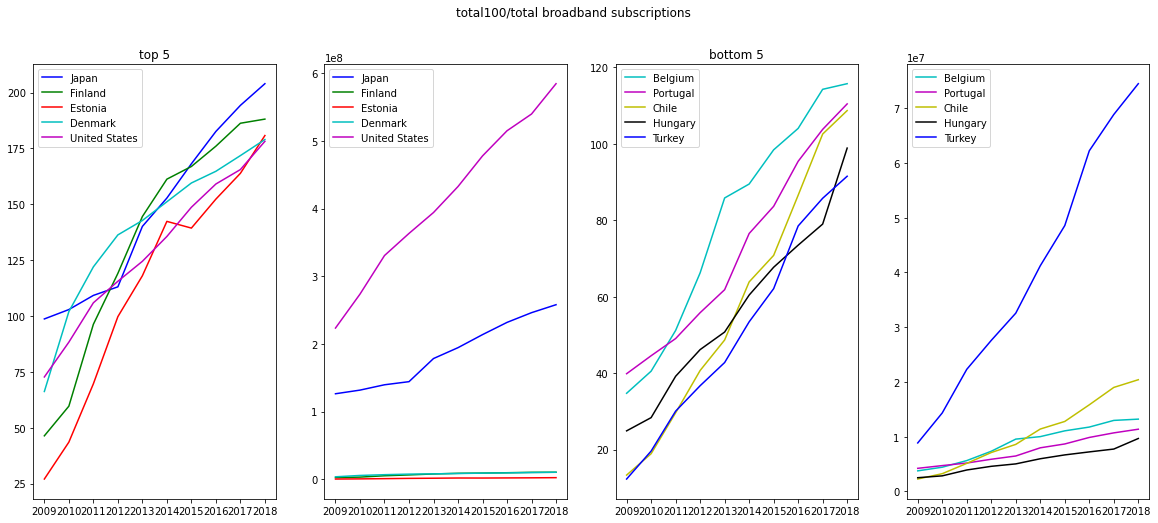

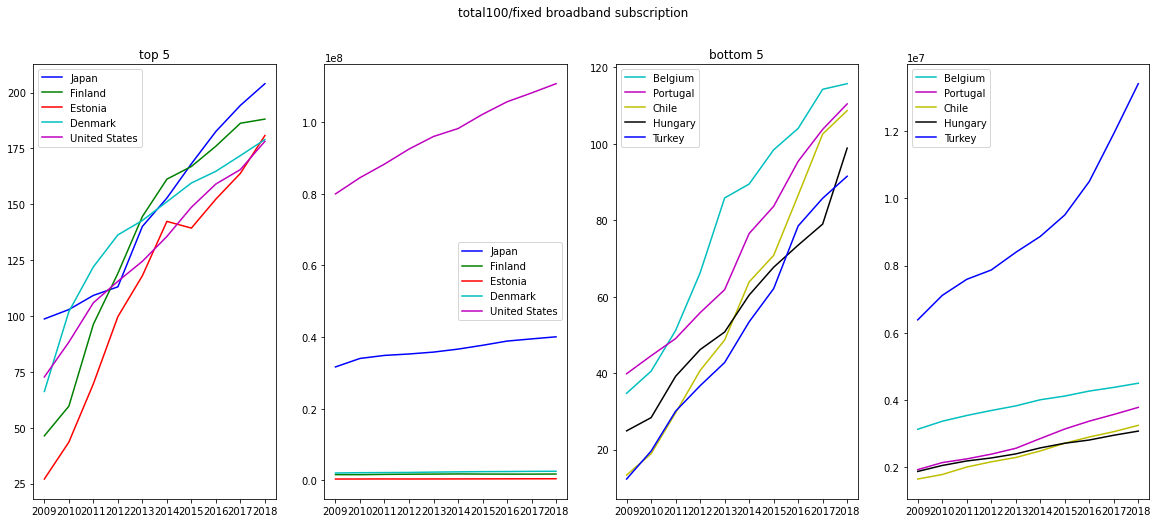

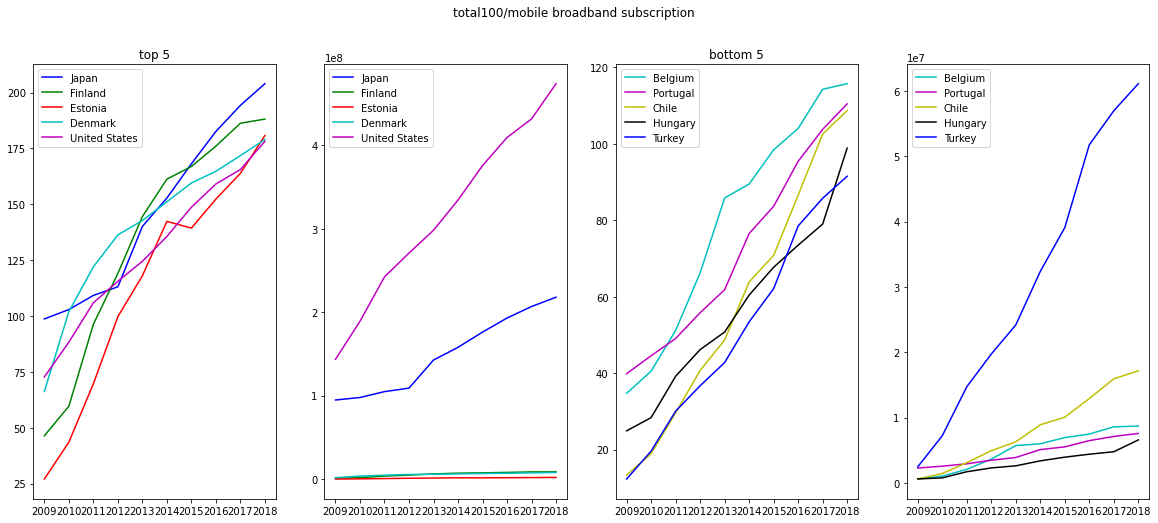

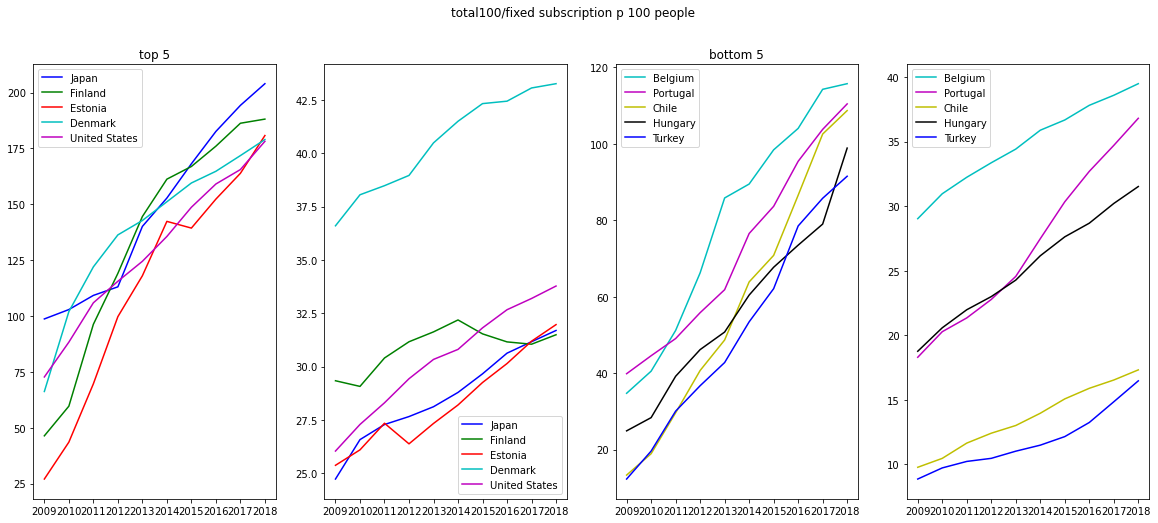

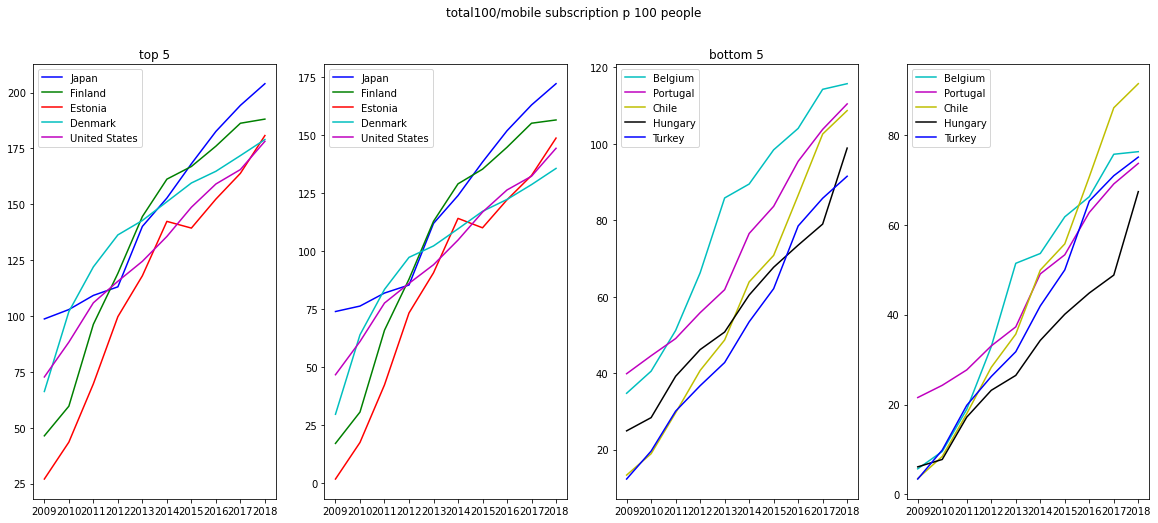

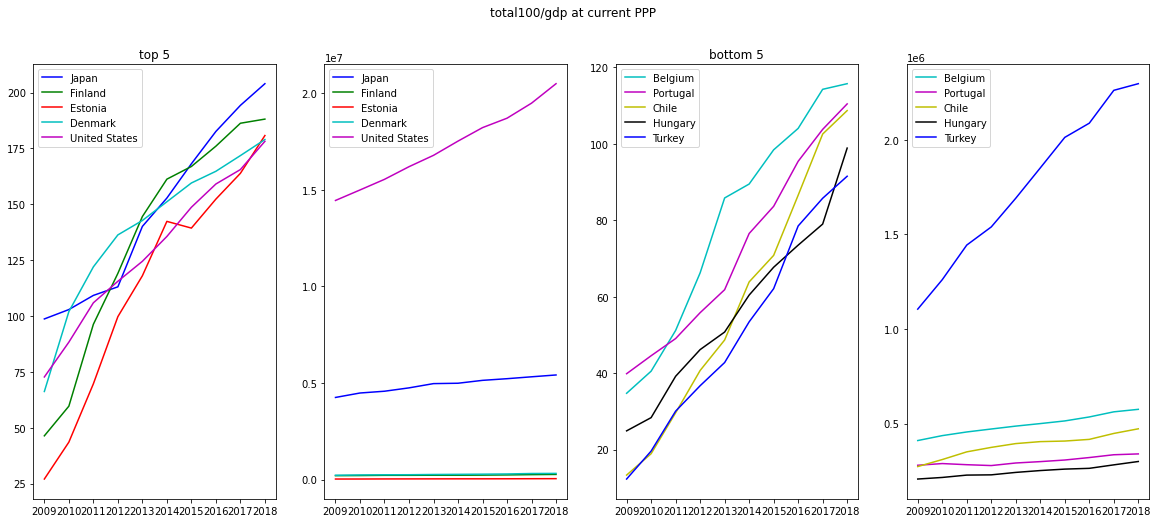

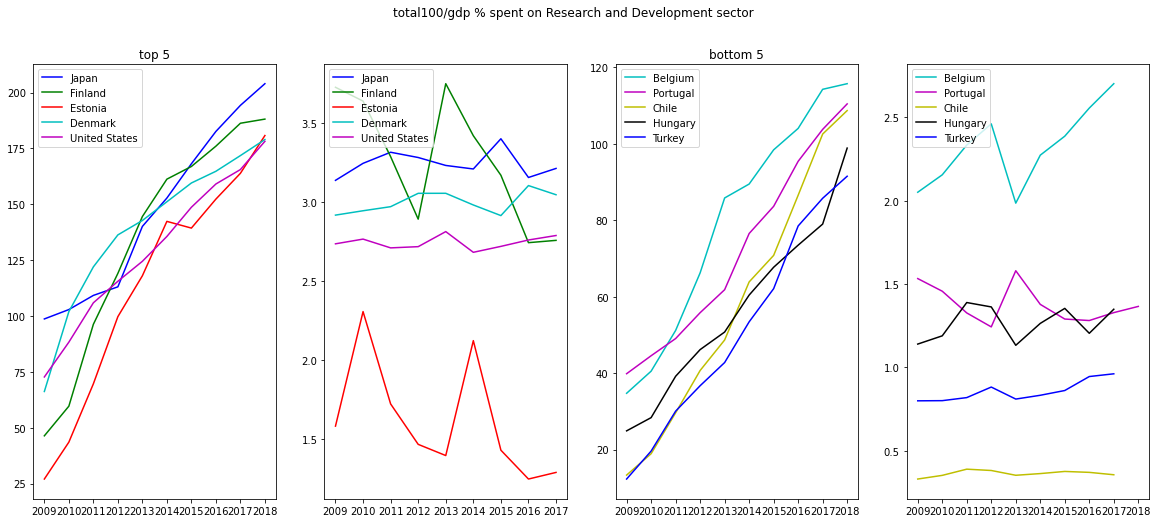

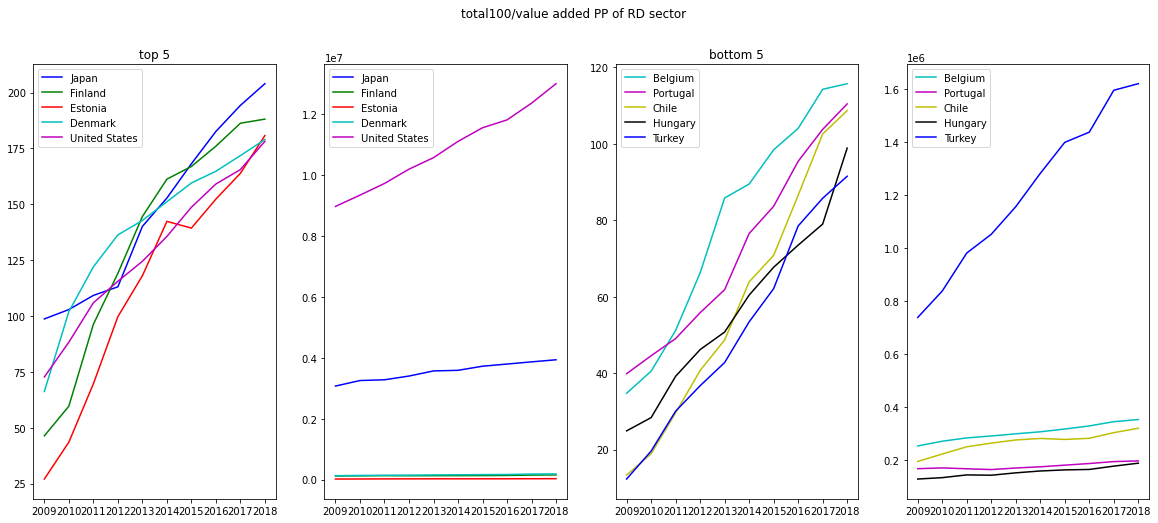

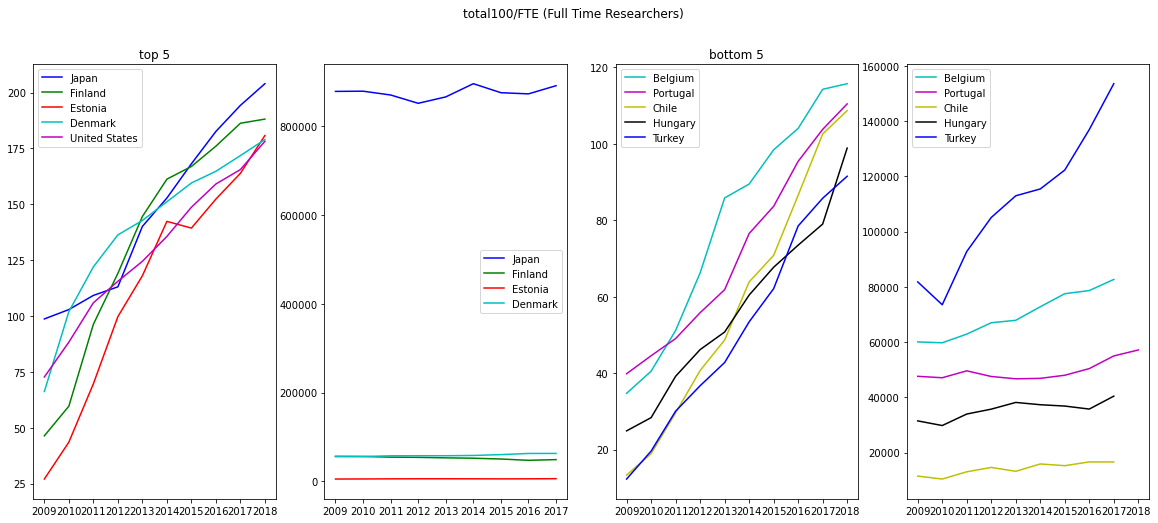

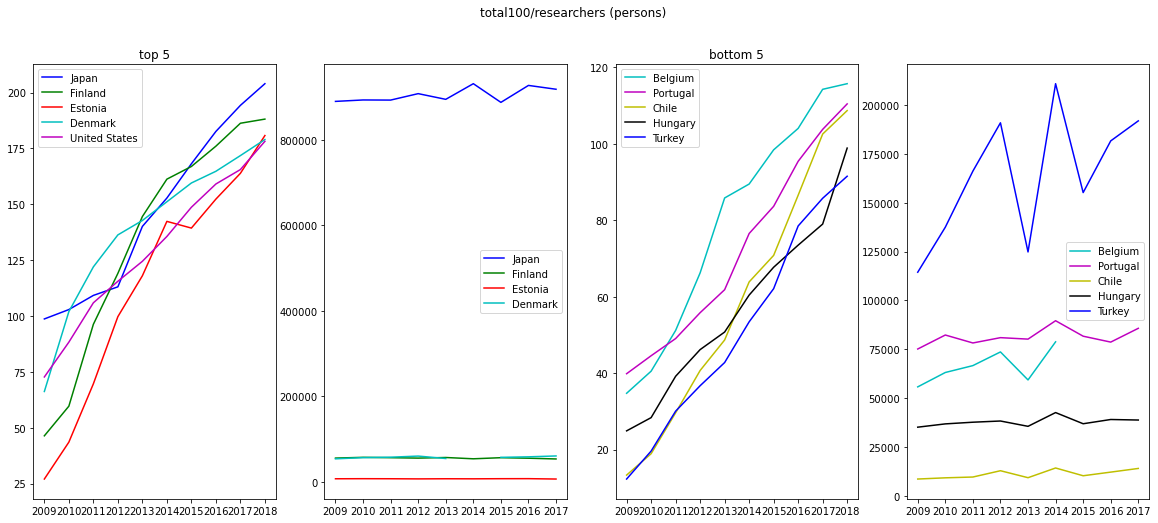

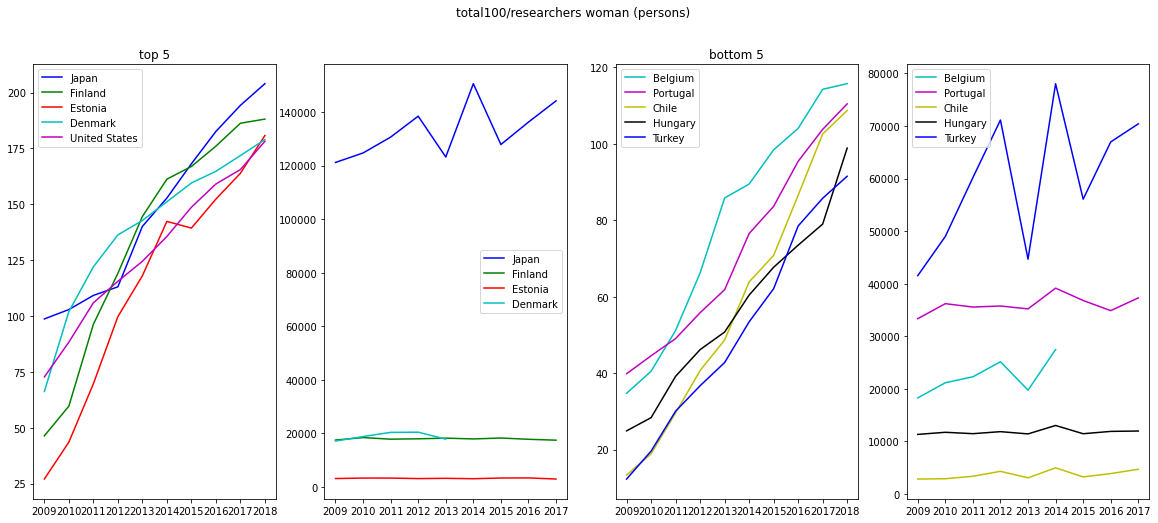

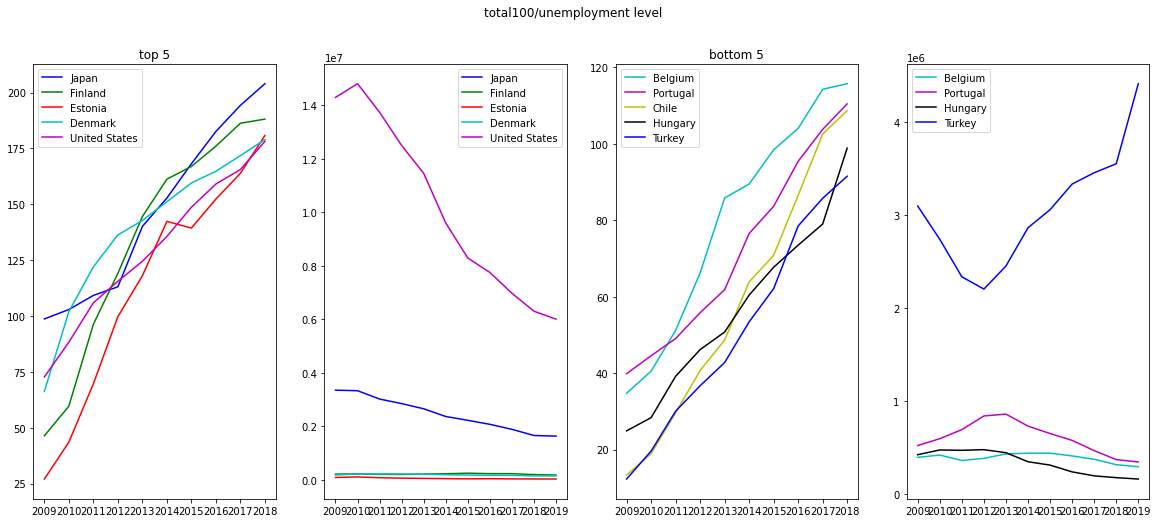

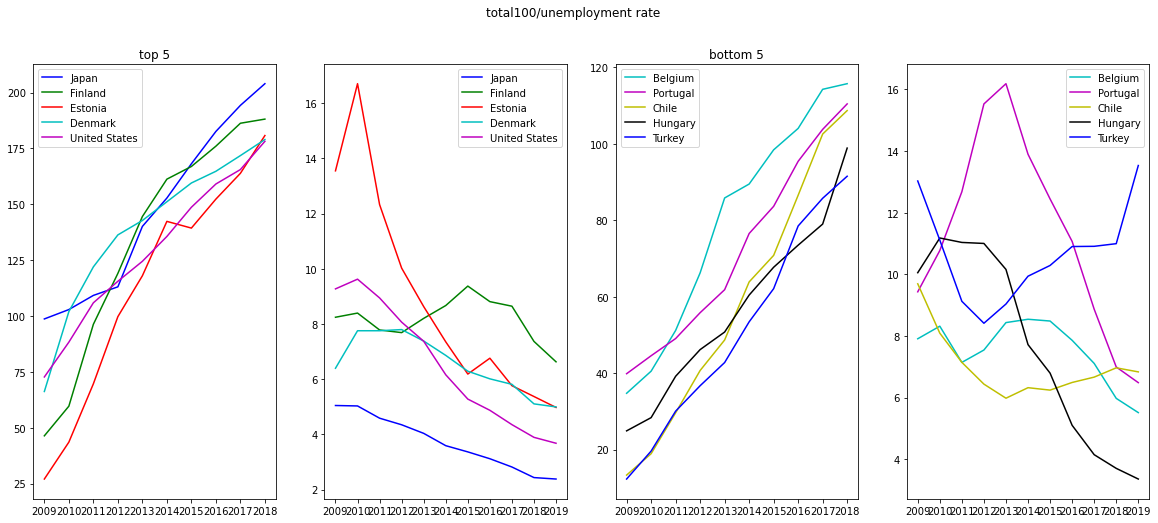

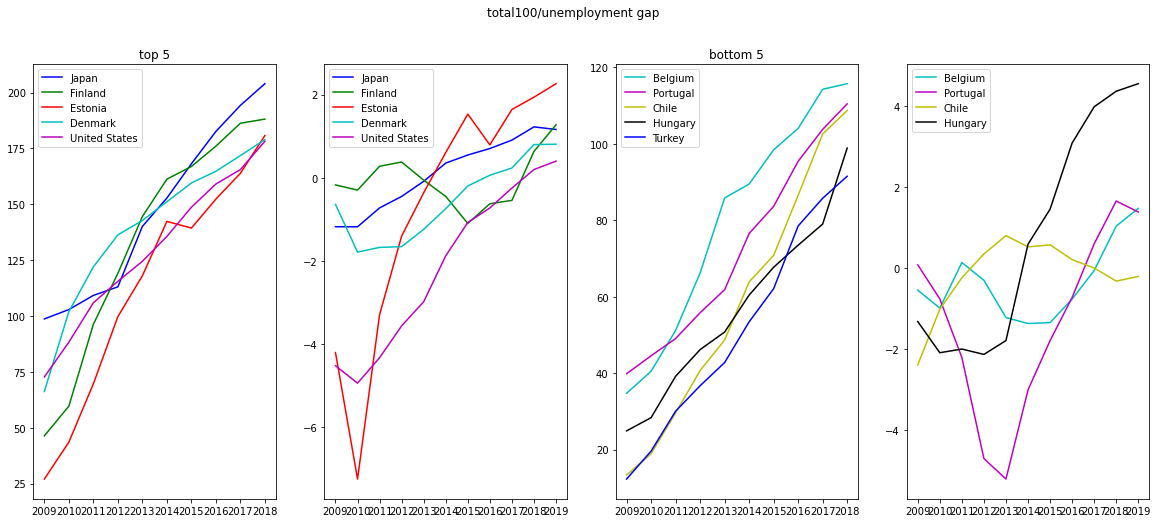

In [246]:
peep2 = plotthese(dataframes, total100_df, 'total100')

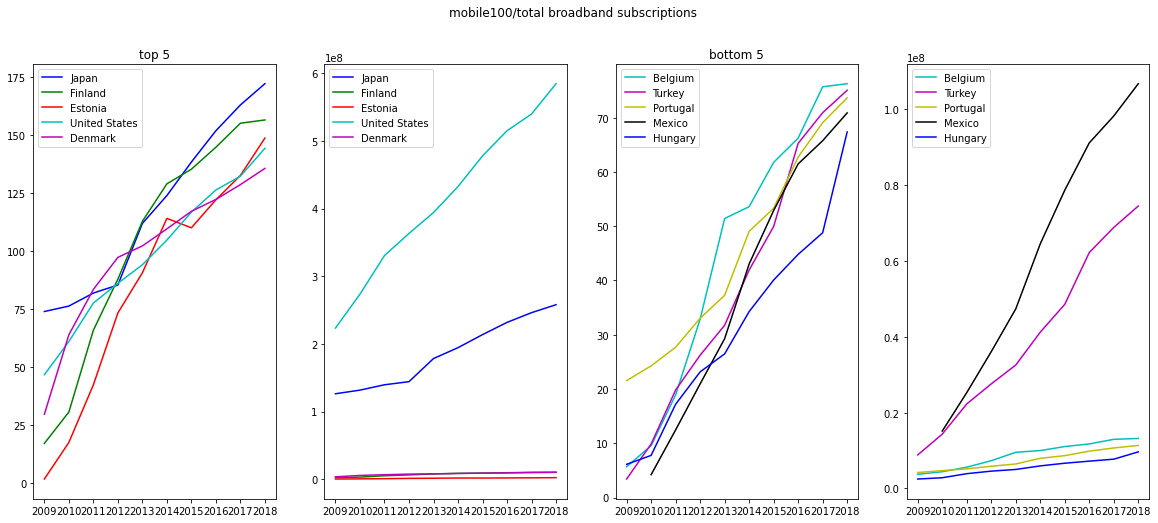

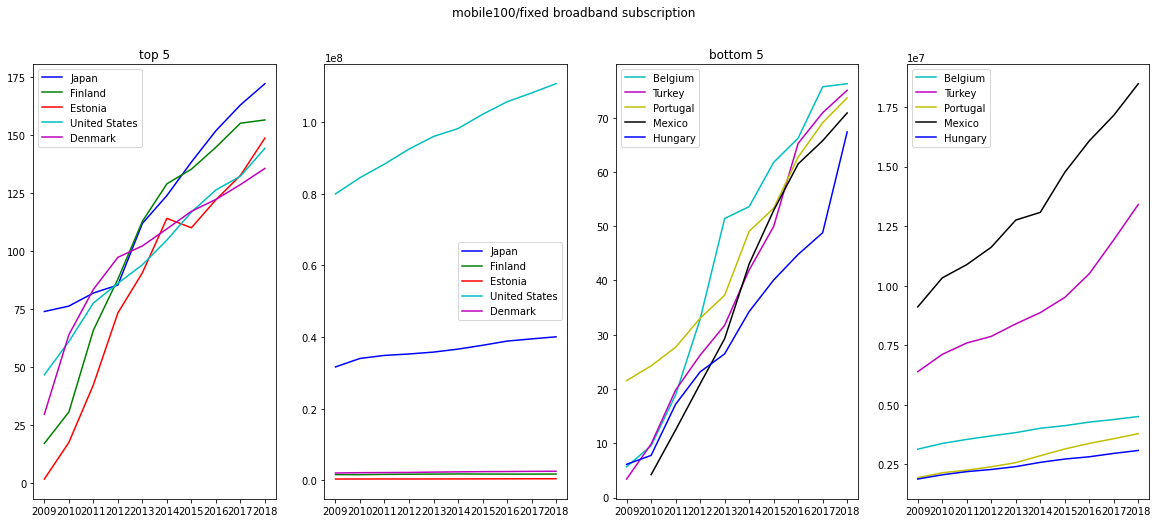

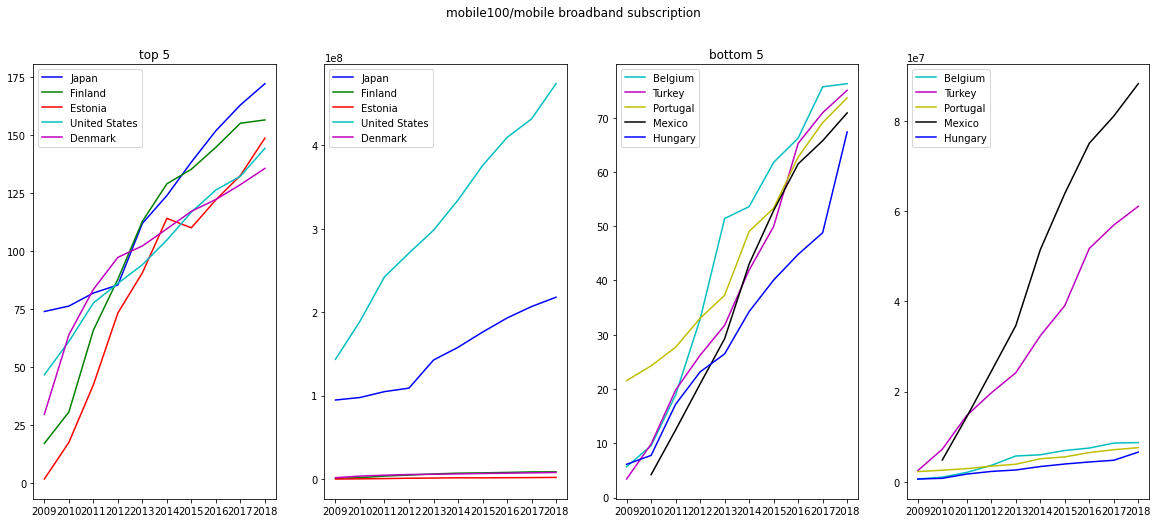

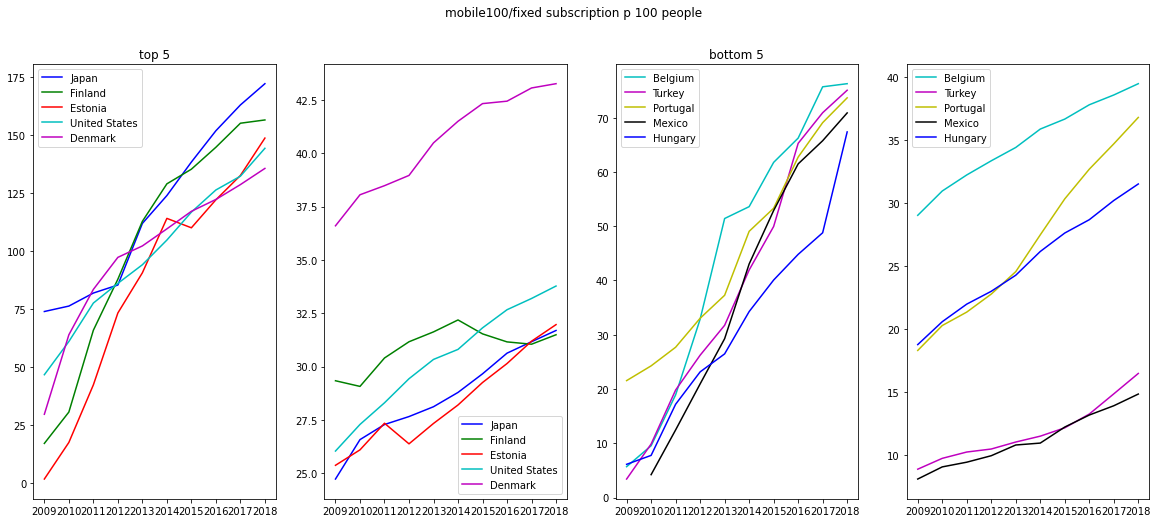

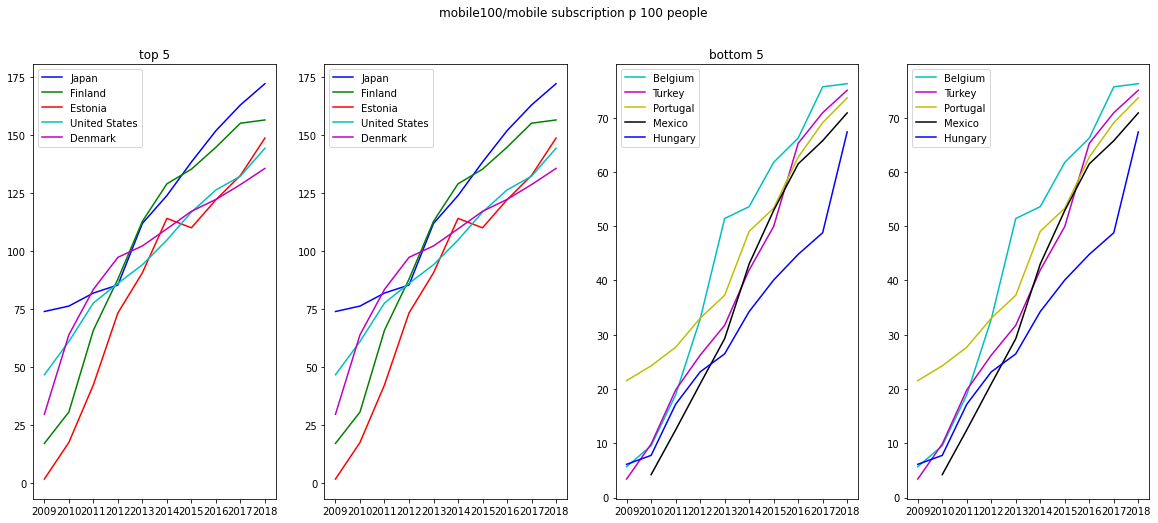

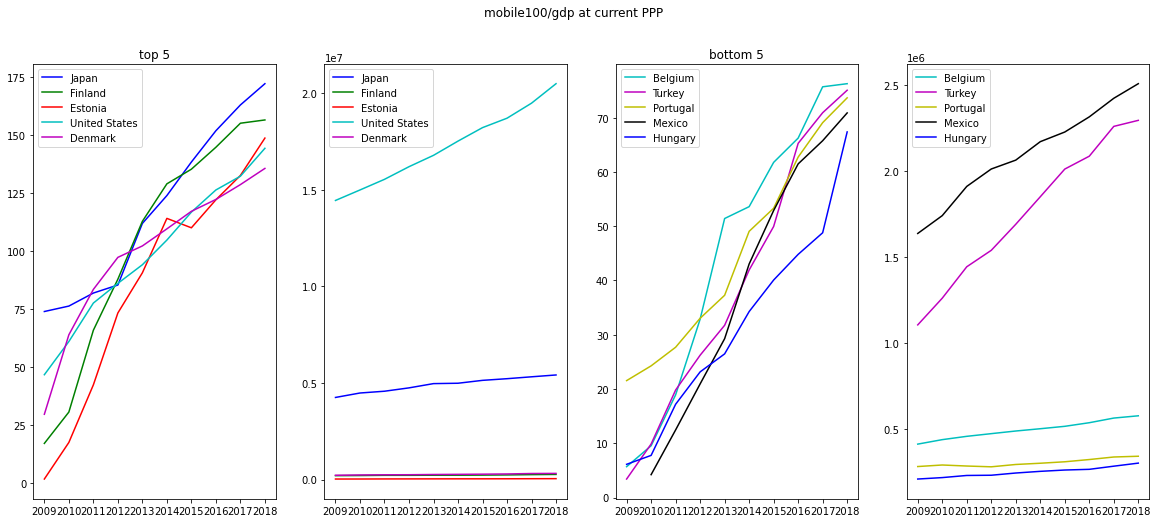

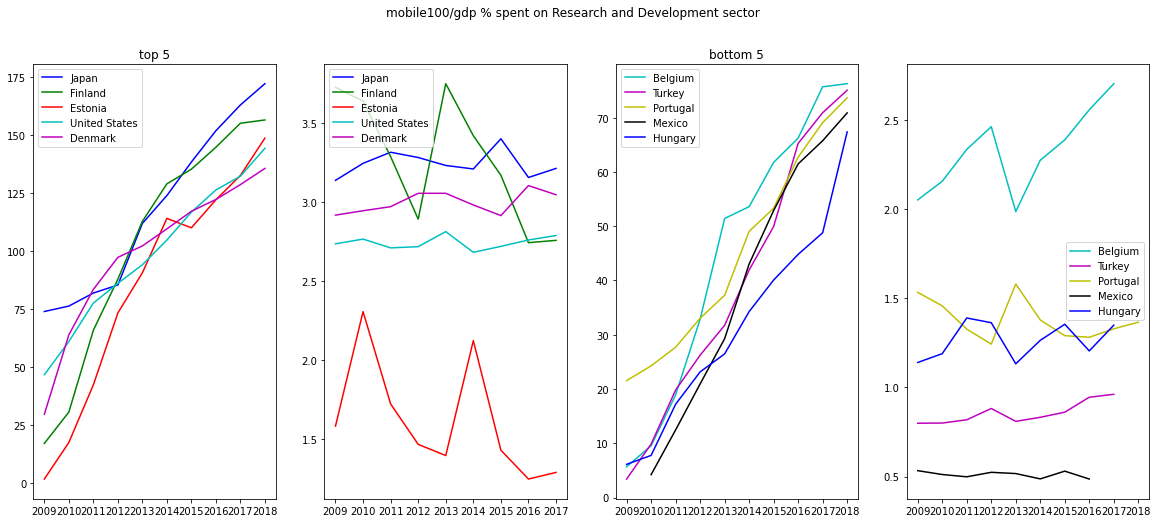

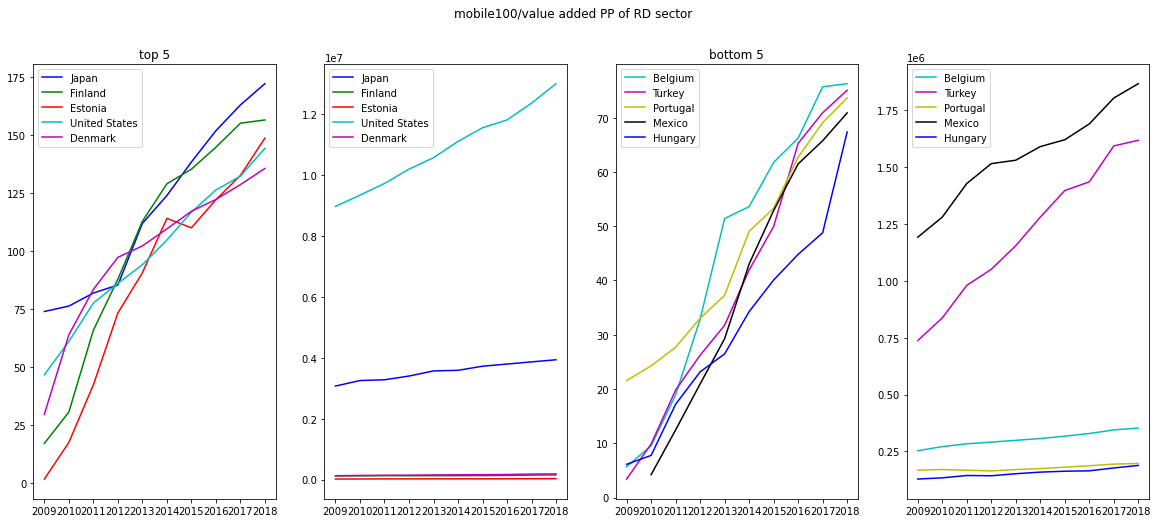

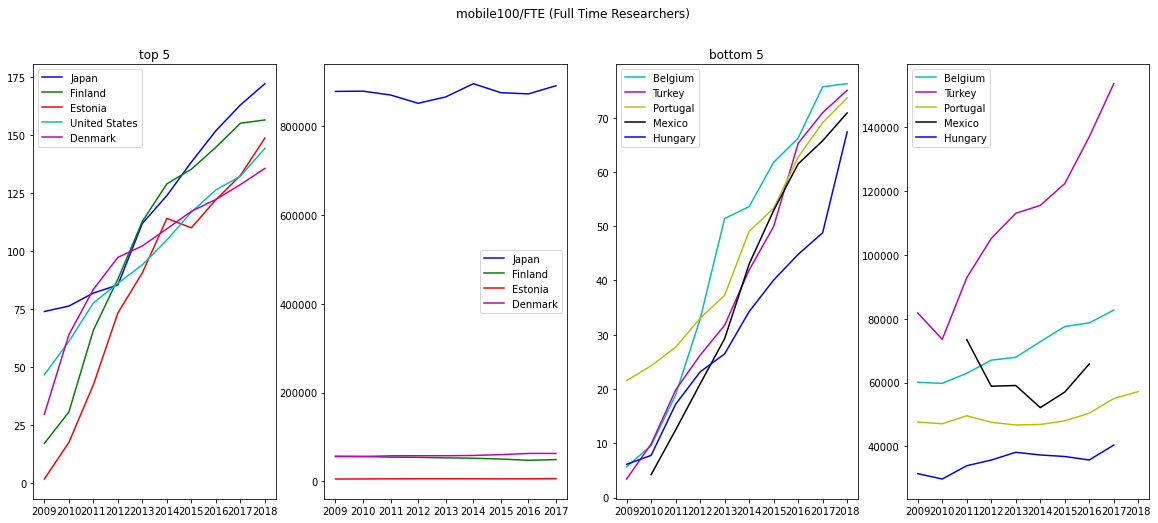

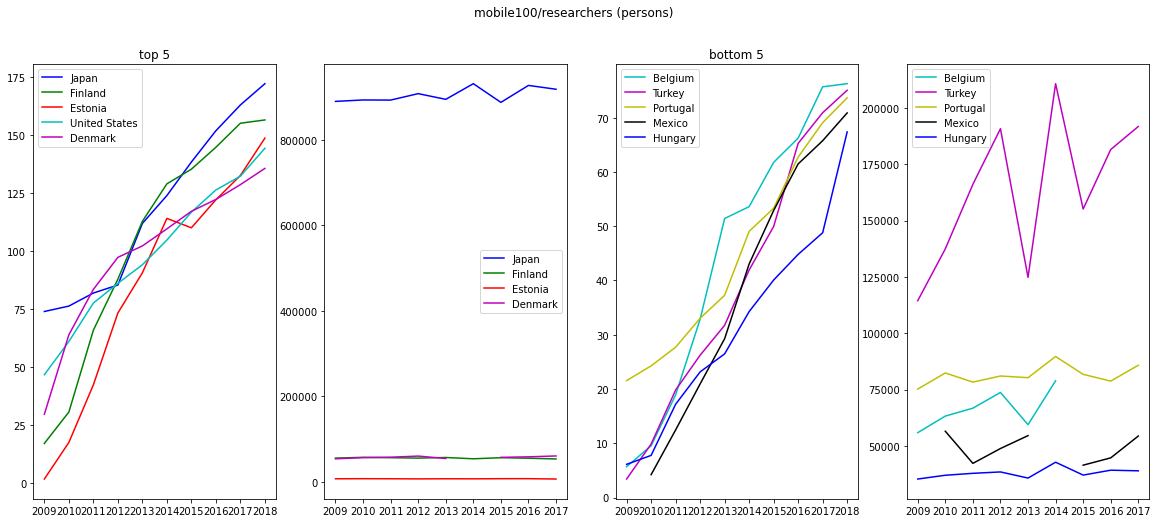

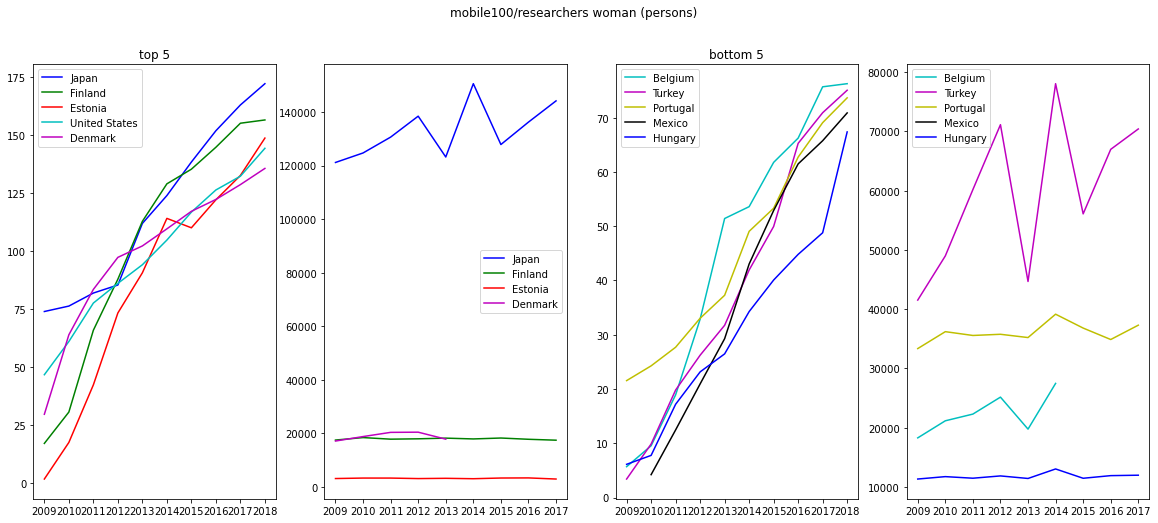

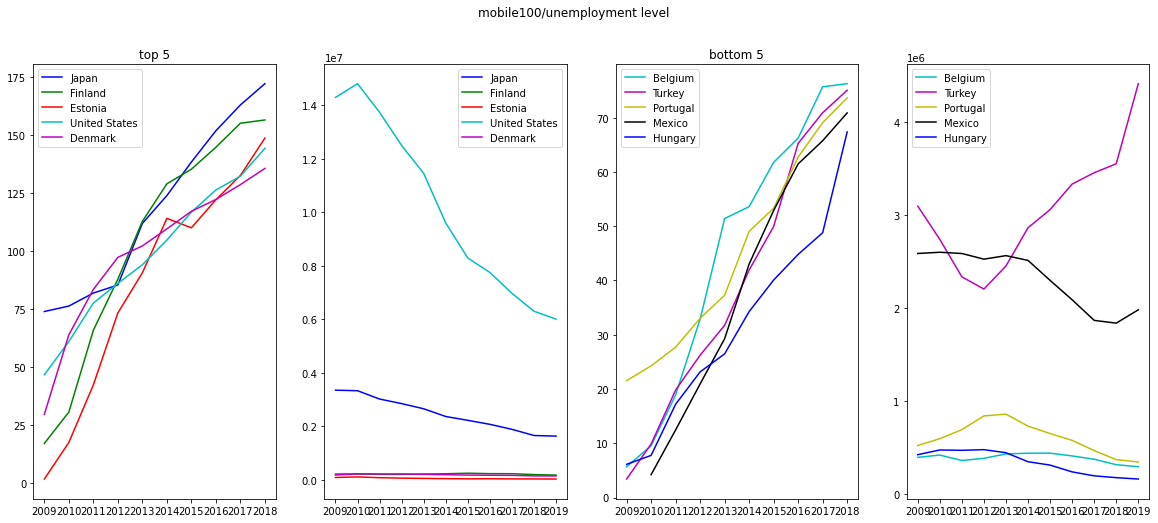

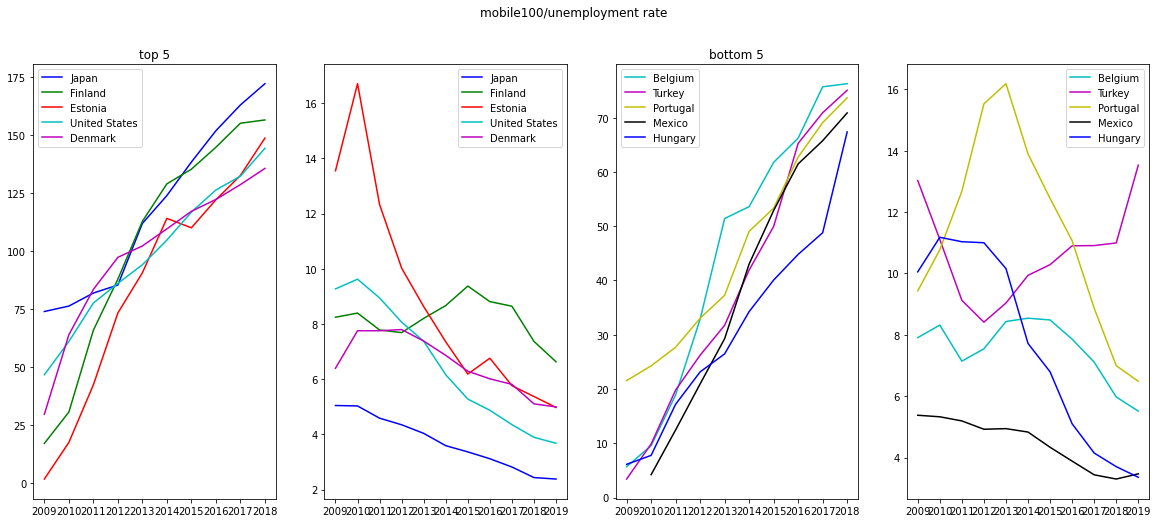

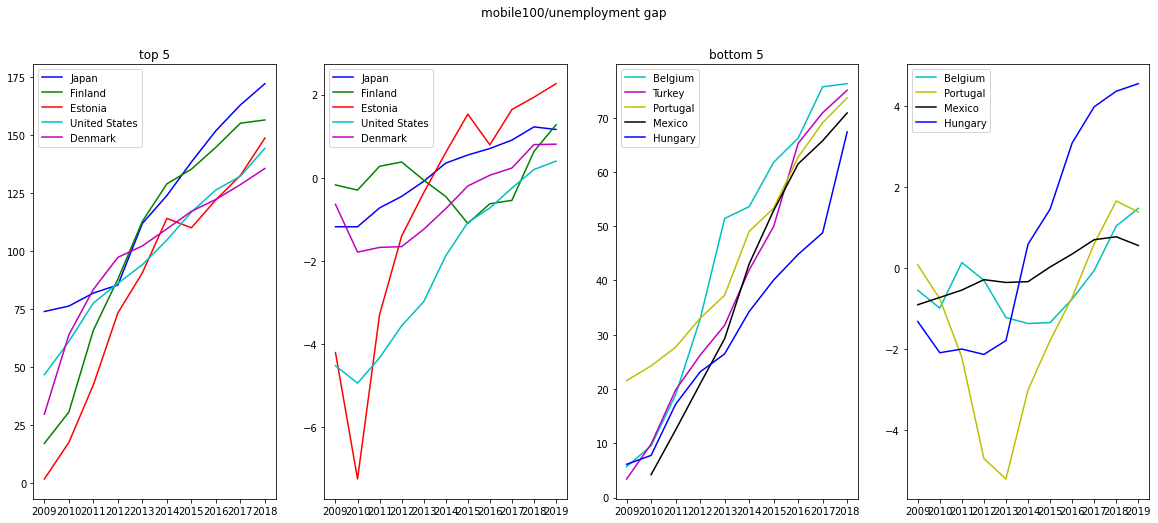

In [247]:
mobile100plot = plotthese(dataframes, mobile100_df, 'mobile100')

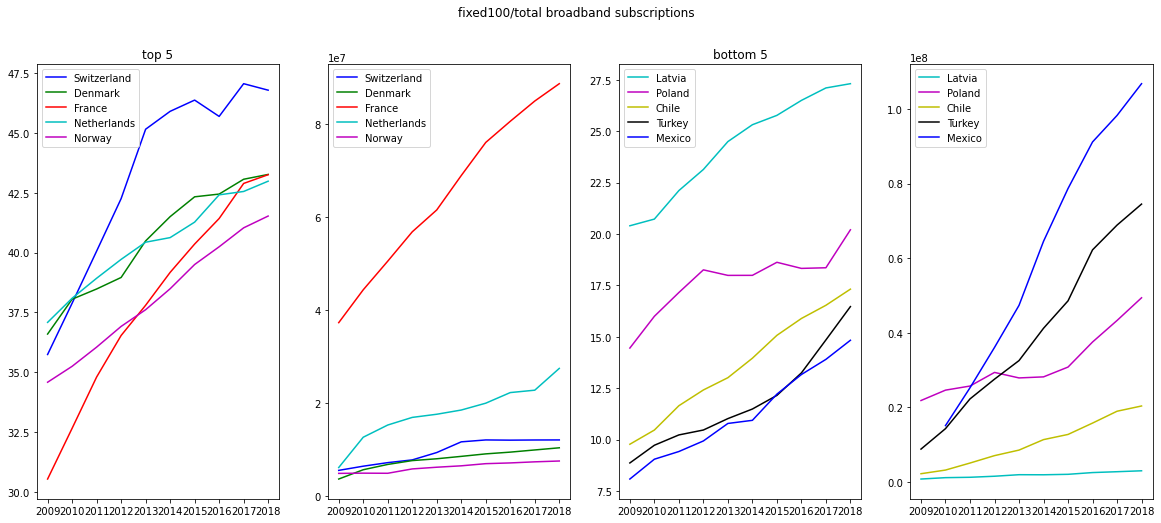

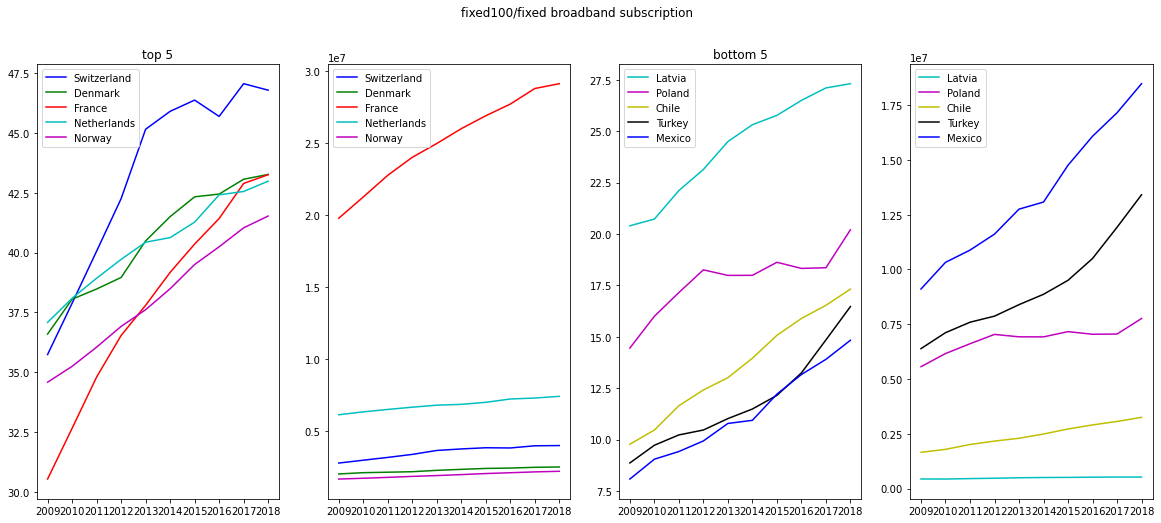

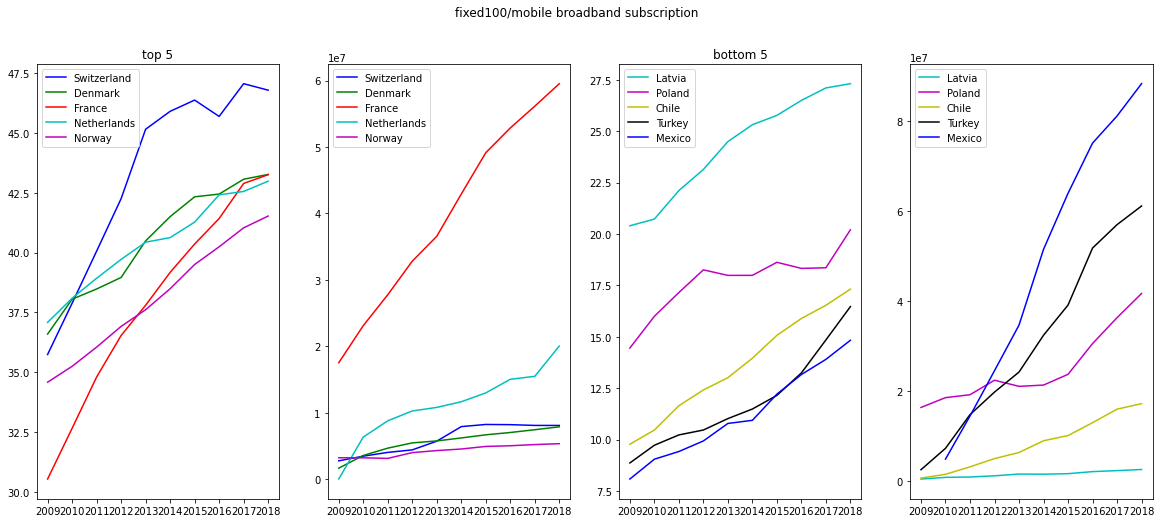

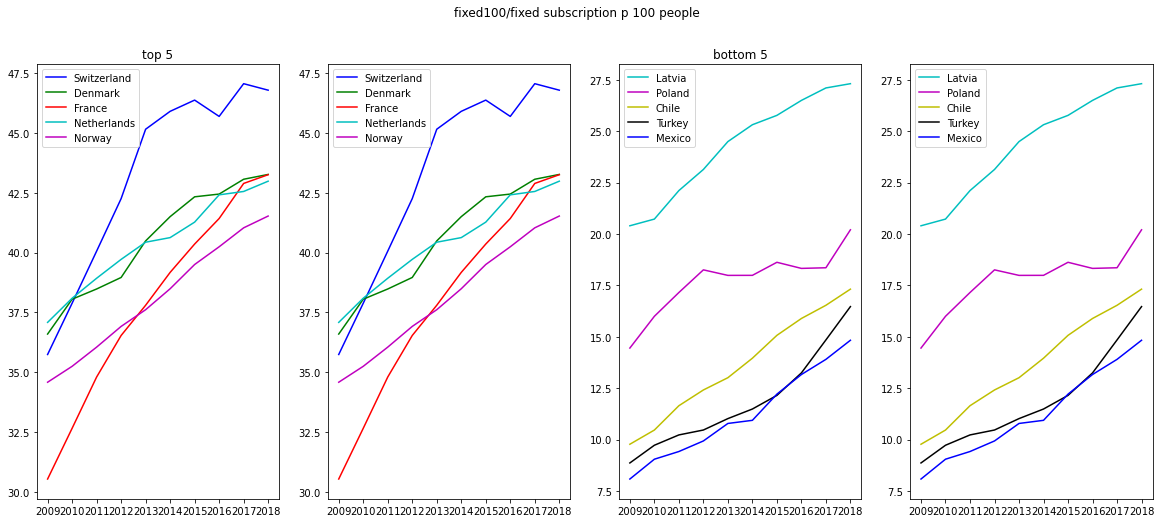

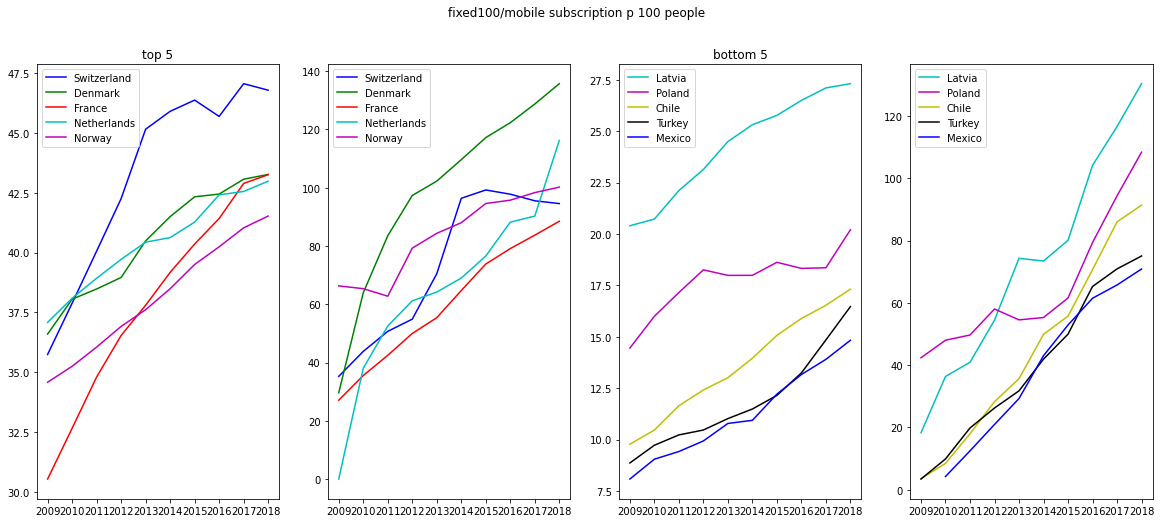

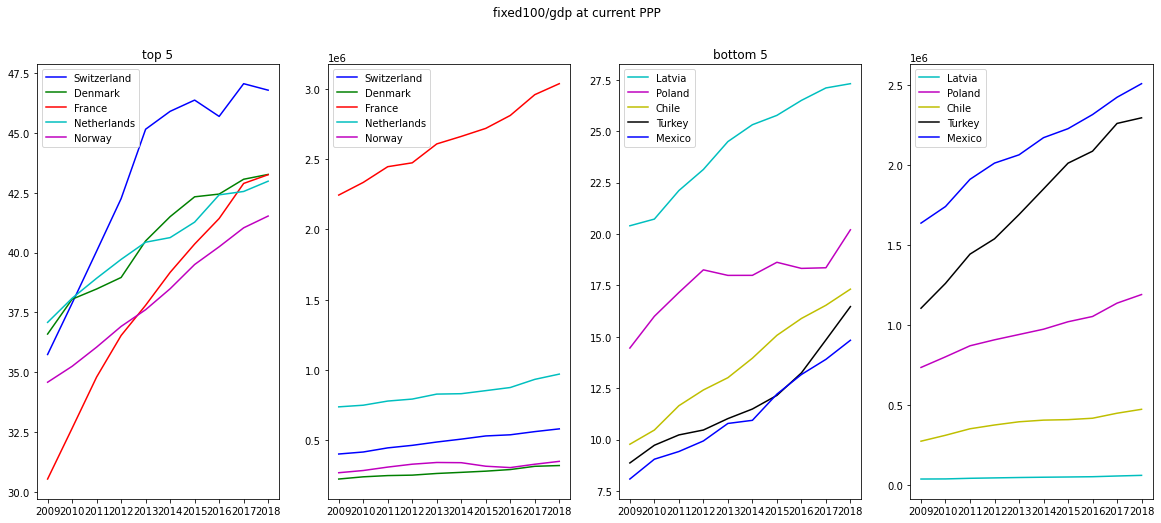

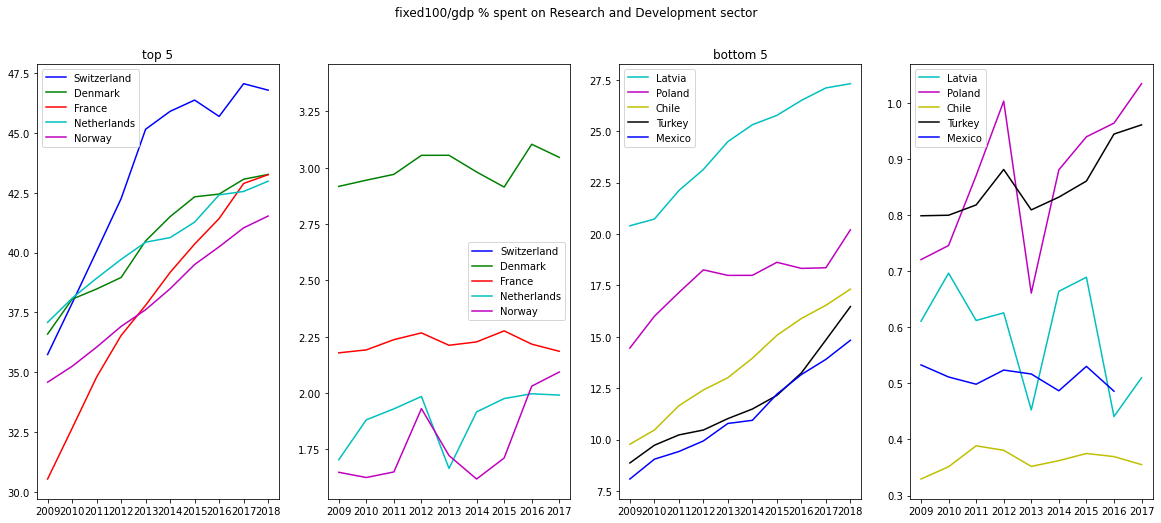

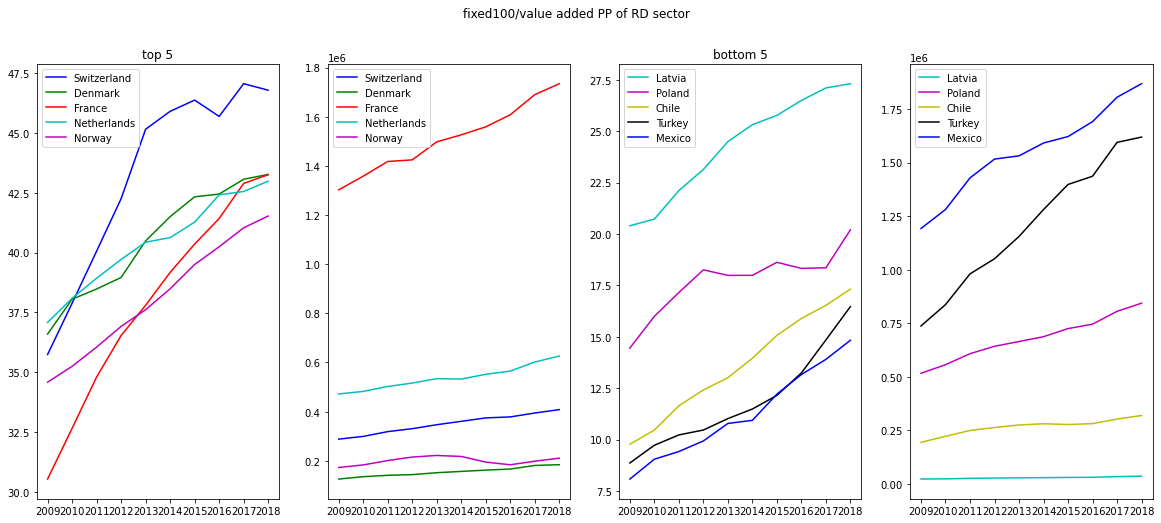

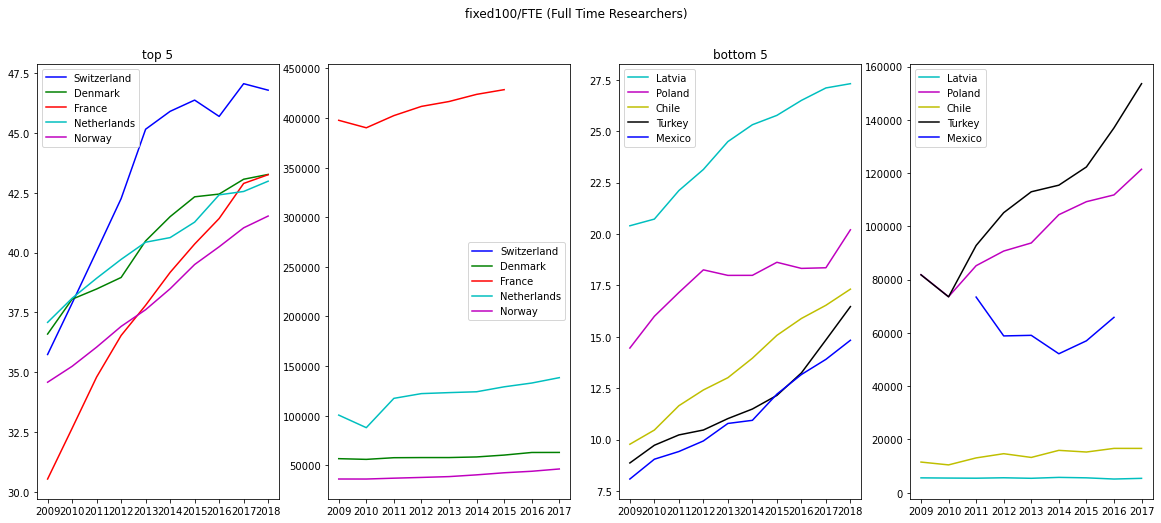

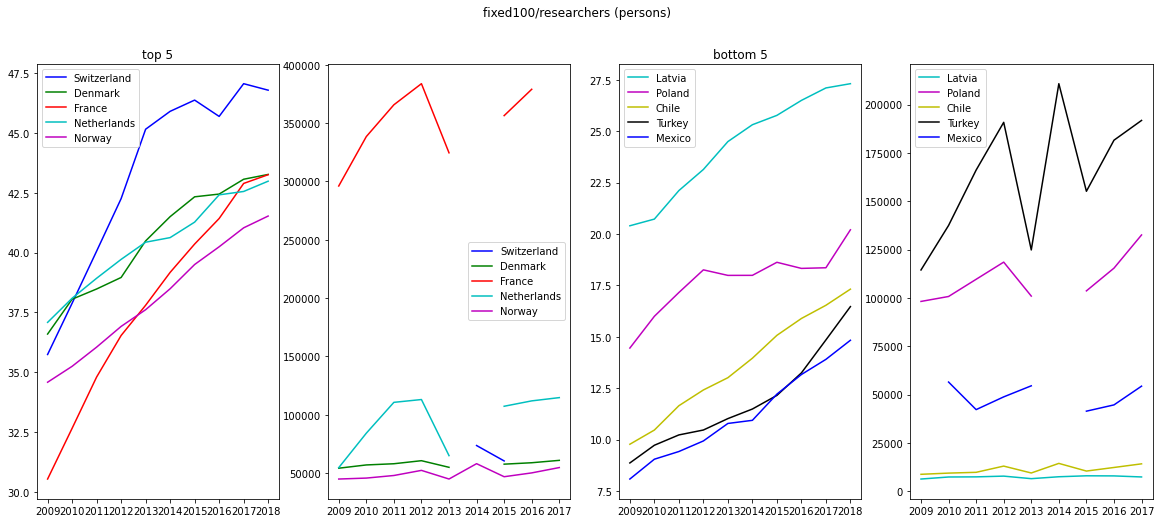

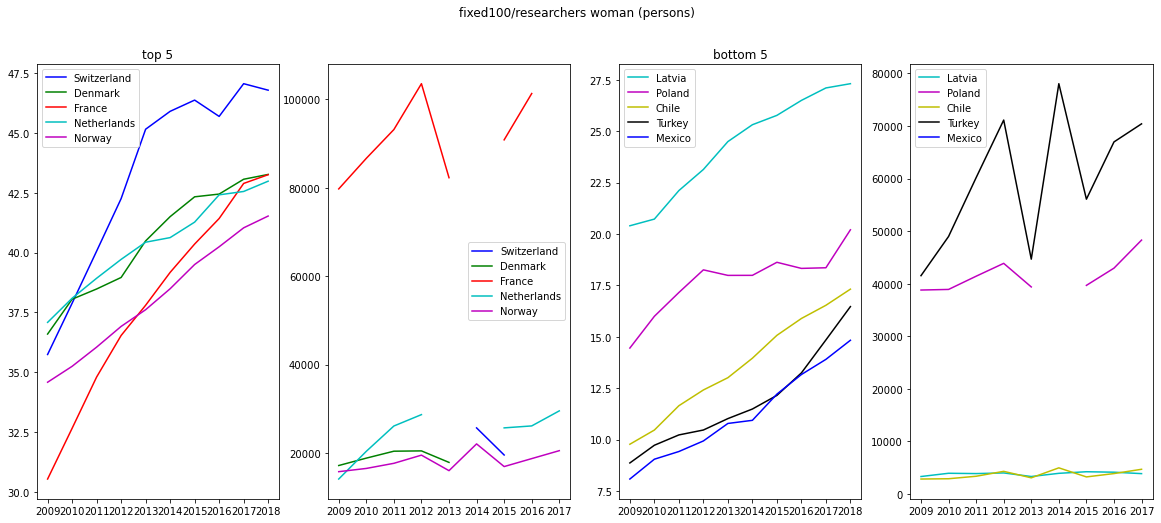

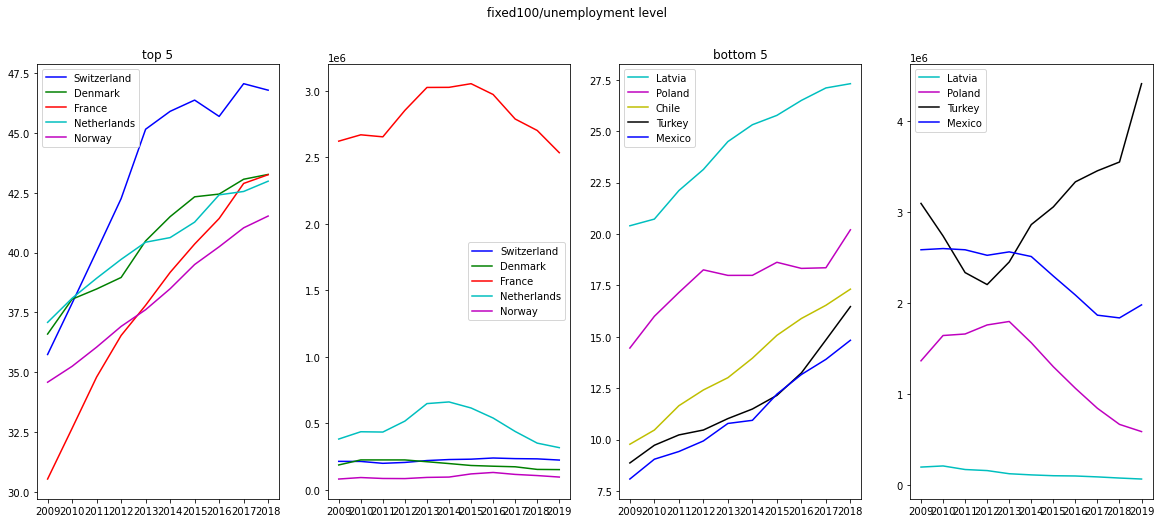

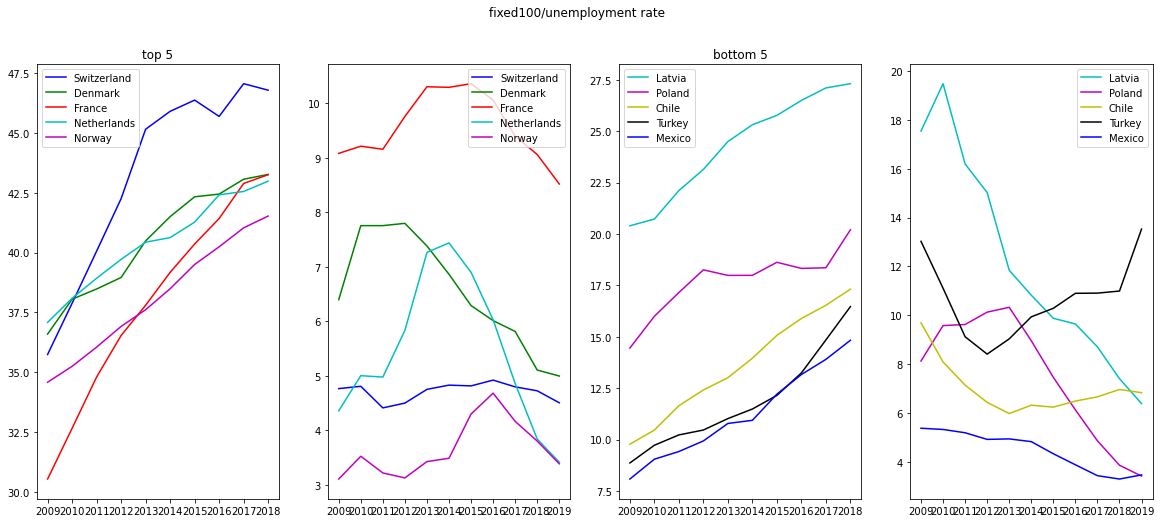

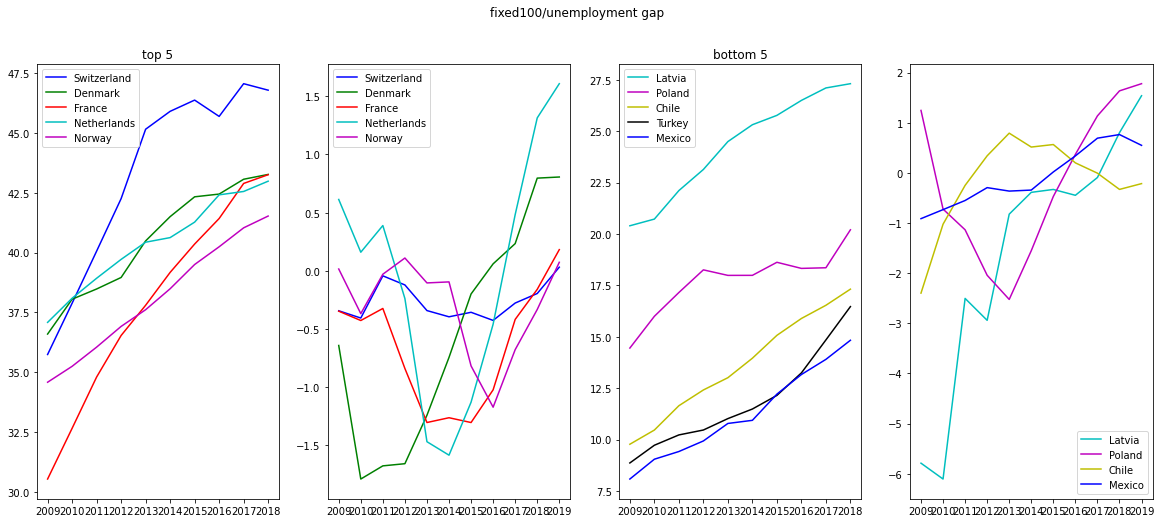

In [248]:
fixed100plot = plotthese(dataframes, fixed100_df, 'fixed100')

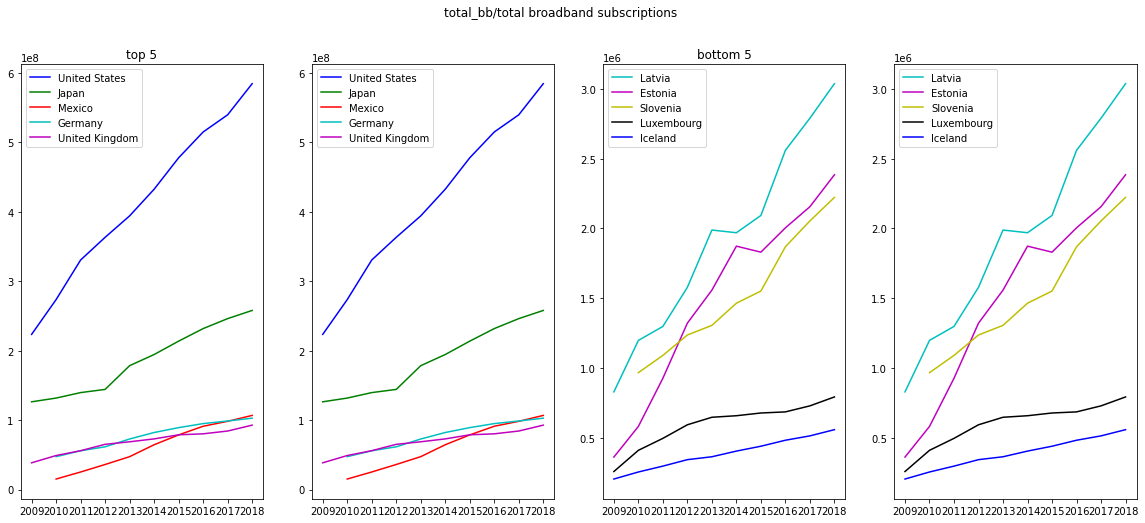

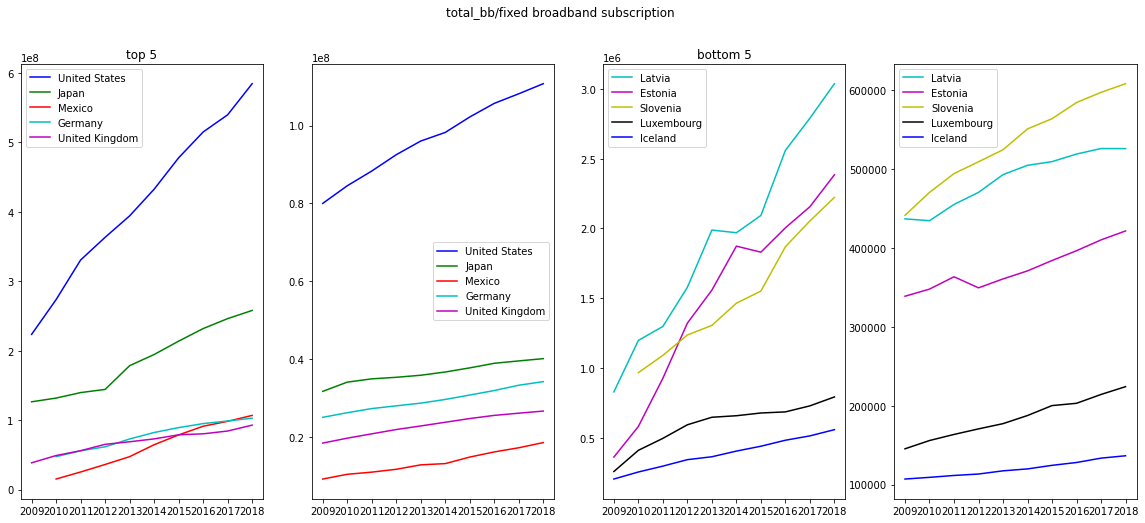

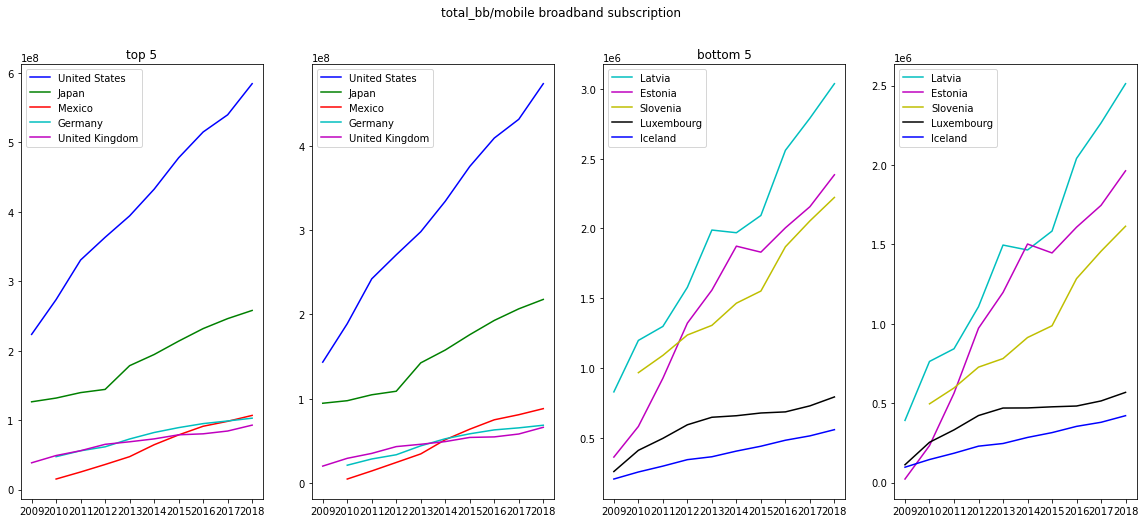

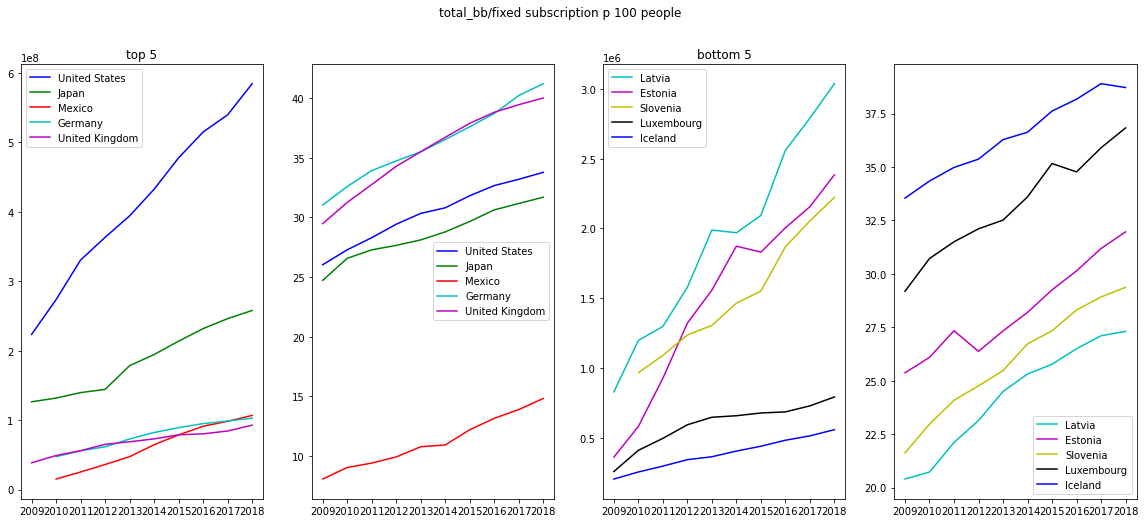

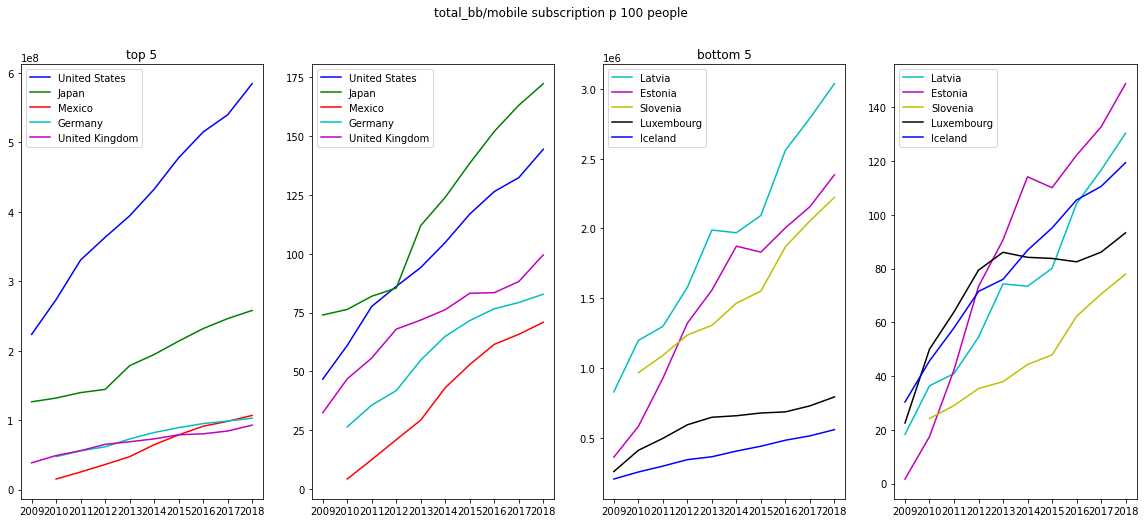

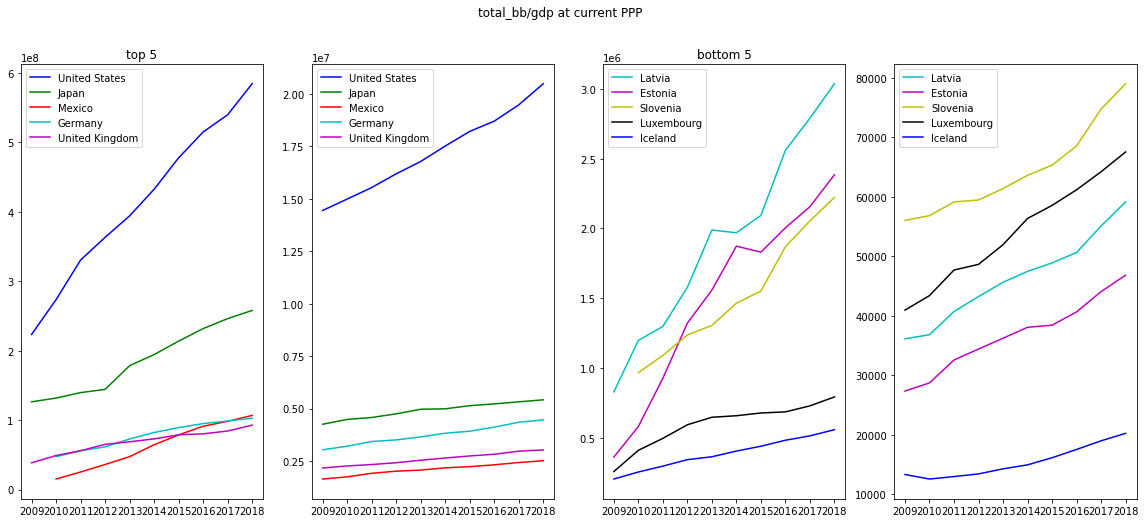

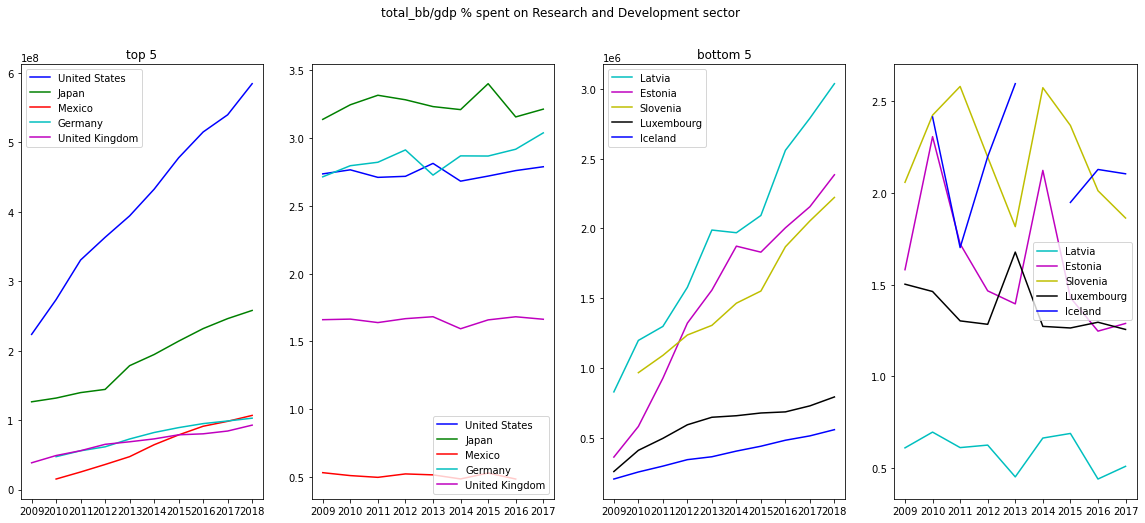

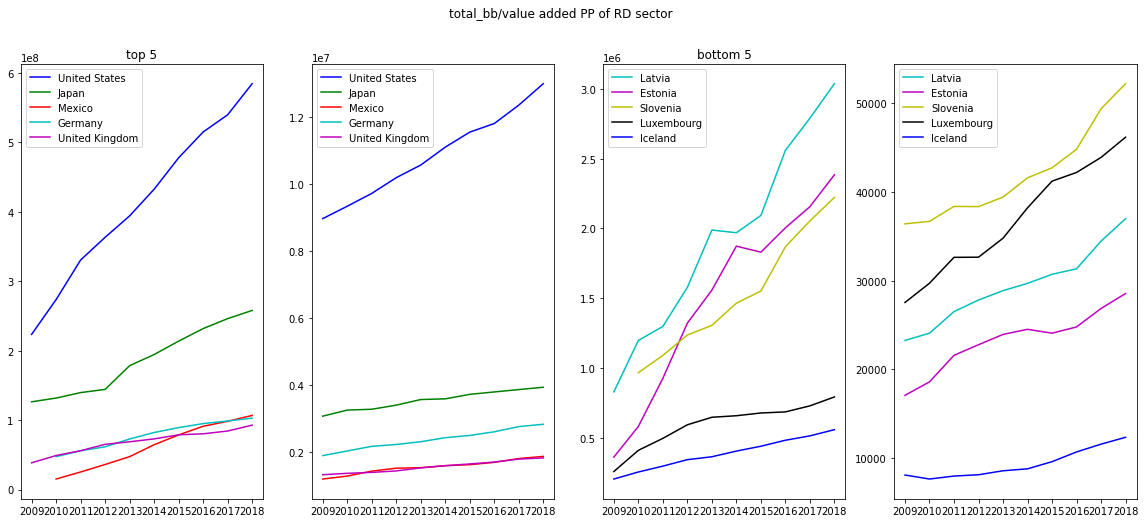

No handles with labels found to put in legend.


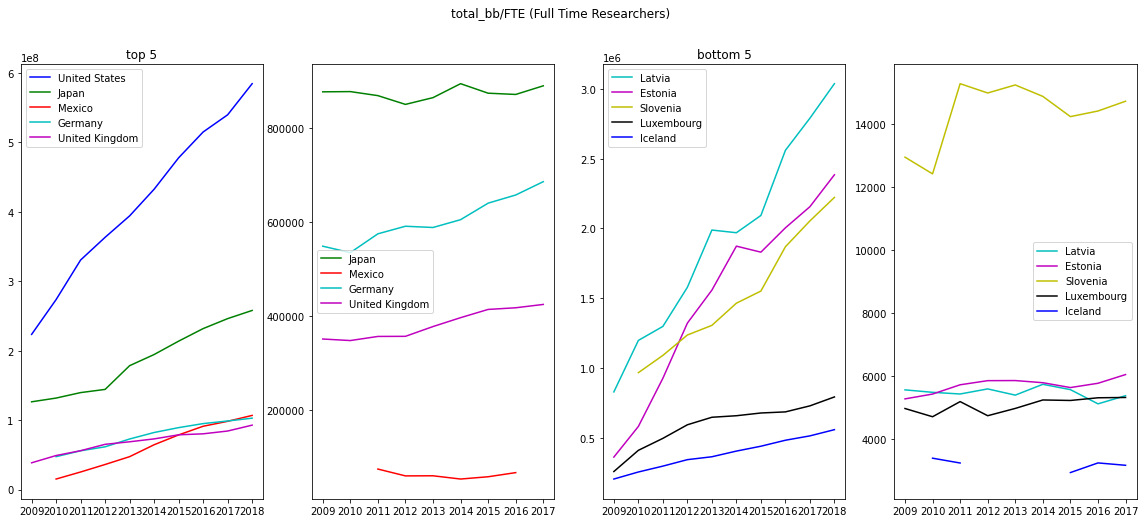

No handles with labels found to put in legend.


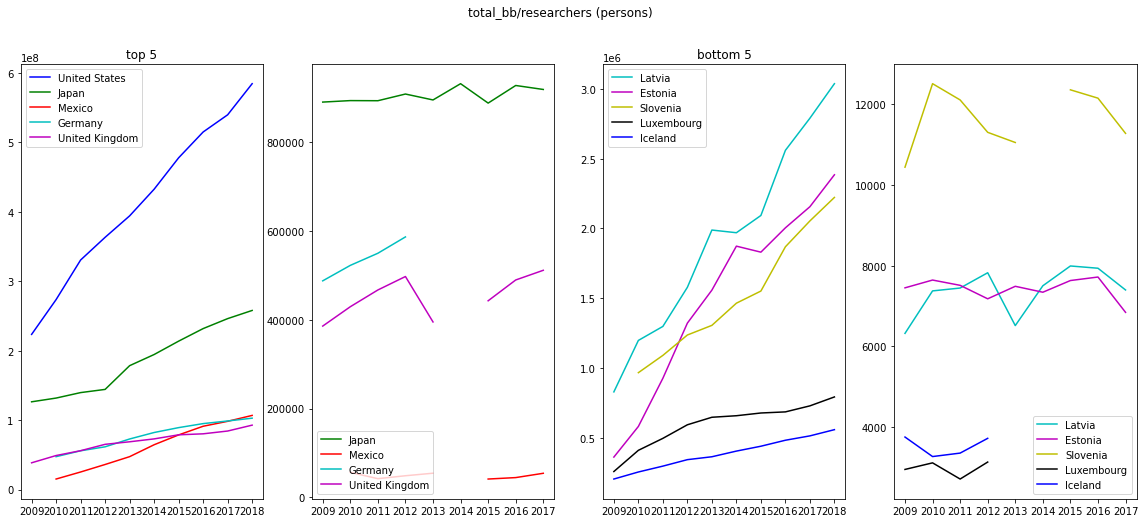

No handles with labels found to put in legend.


In [ ]:
peep = plotthese(dataframes, total_bb_df, 'total_bb')

In [ ]:
mobileplot = plotthese(dataframes, mobile_df, 'mobile')

In [ ]:
fixedplot = plotthese(dataframes, fixed_df, 'fixed')

In [112]:
## to find desired code_dict

# what = zip(list(econ_df['VARIABLE']), list(econ_df['Variable']))
# uni = {}
# for i in what:
#     if i not in uni:
#         uni[i[0]] = i[1]
#     else:
#         pass
# uni

In [ ]:
## make a percentage column where fixed + mobile / total pop is a value
### %connected to mobile